<a href="https://colab.research.google.com/github/Pipickin/Tensorflow/blob/main/TF_API_exapmle/tf_function_and_GradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

#def tf.function

In [ ]:
c1 = tf.constant([1,2,3])
c2 = tf.constant([-2,3,-2])

In [ ]:
@tf.function
def f(x):
  if tf.reduce_sum(x)>0:
    return x**2
  else:
    return x**3

In [ ]:
def just_f(x):
  if tf.reduce_sum(x)>0:
    return x**2
  else:
    return x**3
print(just_f(c1))
print(just_f(c2))  

tf.Tensor([1 4 9], shape=(3,), dtype=int32)
tf.Tensor([-8 27 -8], shape=(3,), dtype=int32)


In [ ]:
print(f(c1))
print(f(c2))

tf.Tensor([1 4 9], shape=(3,), dtype=int32)
tf.Tensor([-8 27 -8], shape=(3,), dtype=int32)


In [ ]:
@tf.function
def f1(x):
  for i in x:
    if i>0:
      print('+')
    else:
      print('-')

In [ ]:
f1(c1)

+
-


In [ ]:
for i in c1:
  print(i.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=1>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=2>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=3>>


In [ ]:
l = []
@tf.function
def f(x):
  for i in x:
    l.append(i + 1)    # Caution! Will only happen once when tracing
f(tf.constant([1, 2, 3]))
l

[<tf.Tensor 'while/add:0' shape=() dtype=int32>]

In [ ]:
@tf.function 
def sum_c1_and_c2():
  return c1+c2

In [ ]:
sum_c1_and_c2()

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([-1,  5,  1], dtype=int32)>

In [ ]:
@tf.function
def create_c3():
  c3 = tf.constant([1,2,3,4,5])
  tf.print(c3)
  return c3

In [ ]:
c3 = create_c3()

[1 2 3 4 5]


# assign to variable

In [ ]:
var1 = tf.Variable(1)
tf.print(var1)
var1.assign(2)
tf.print(var1)
var1.assign_add(2)
tf.print(var1)

1
2
4


In [ ]:
var2 = tf.Variable([1,2])
tf.print(var2)
var2.assign([3,1])
tf.print(var2)

[1 2]
[3 1]


In [ ]:
mat1 = tf.Variable([[1,2]])
mat2 = tf.constant([[10]])
tf.matmul(mat2,mat1)

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[10, 20]], dtype=int32)>

# GradientTape 

In [ ]:
x = tf.Variable(5.0) # here could be a tf.constant instead of Variabe
with tf.GradientTape() as g:
  g.watch(x)
  y = x**2
tf.print(x)
tf.print(y)
dy_dx = g.gradient(y,x)
tf.print(dy_dx)

5
25
10


In [ ]:
x = tf.Variable(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x*x
  dy_dx = gg.gradient(y,x)
d2y_dx2 = g.gradient(dy_dx,x)
tf.print(x)
tf.print(y)
tf.print(dy_dx)
tf.print(d2y_dx2)

5
25
10
2


In [ ]:
x = tf.constant(8.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  y = x*x
  z = x*x*x
  t = y*y 
dy_dx = g.gradient(y, x)
dz_dx = g.gradient(z,x)
dt_dz = g.gradient(t,y)
tf.print(dy_dx)
tf.print(dz_dx)
tf.print(dt_dz)
del g

16
192
128


In [ ]:
x = tf.constant([[1.,2.],[3.,4.]])
with tf.GradientTape() as g:
  g.watch(x)
  y = x*x
jacob = g.batch_jacobian(y,x)
tf.print(x)
tf.print(y)
tf.print(jacob)

[[1 2]
 [3 4]]
[[1 4]
 [9 16]]
[[[2 0]
  [0 4]]

 [[6 0]
  [0 8]]]


In [ ]:
with tf.GradientTape(persistent=True) as tape:
  trainable = tf.Variable(1.)
  non_trainable = tf.Variable(2., trainable=False)
  x1 = trainable * 2.
  x2 = non_trainable * 3.
tf.print(tape.gradient(x1, trainable))

tf.print(tape.gradient(x2, non_trainable))

2
None


# Eager execution



## fizzbuzz


In [ ]:
def fizzbuzz(max_number:int)->None:
  counter = tf.constant(0)
  max_number = tf.convert_to_tensor(max_number)
  for num in range(1, max_number+1):
    num = tf.constant(num)
    if num%3==0 and num%5==0:
      print('fizzbuzz')
    elif num%3==0:
      print('fizz')
    elif num%5==0:
      print('buzz')
    else:
      print(num.numpy())
    counter +=1

In [ ]:
fizzbuzz(16)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16


## simple model

In [ ]:
(mnist_images,mnist_labels),_ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices((
    tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
    tf.cast(mnist_labels, tf.int64)))

dataset = dataset.shuffle(1000).batch(32)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(mnist_images.shape)
print(dataset)

(60000, 28, 28)
<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
mnist_model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,[3,3],activation='relu', 
                                                    input_shape=(None,None,1)),
                             tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(10)])

In [ ]:
for images,labels in dataset.take(1):
  print(images.shape)
  
  print(images[0:1].shape)
  print("Logits: ", mnist_model(images[:]).numpy())

(32, 28, 28, 1)
(1, 28, 28, 1)
Logits:  [[ 3.83057399e-03 -1.75341517e-02  9.33981035e-03 -3.63305919e-02
   3.10313632e-03  1.97534971e-02 -1.64488517e-02 -6.21081926e-02
   2.23868545e-02 -1.53865945e-02]
 [ 5.25634876e-03 -2.29520760e-02  1.07724434e-02 -3.96600366e-02
  -1.36197079e-03  2.24576965e-02 -1.86253190e-02 -6.80960715e-02
   1.75050795e-02 -2.04176046e-02]
 [ 4.84873727e-03 -1.93888489e-02  9.80929099e-03 -3.69739272e-02
   7.64412980e-04  2.10347716e-02 -1.58952810e-02 -6.22990392e-02
   1.87489465e-02 -1.65865254e-02]
 [ 4.07624850e-03 -2.09831130e-02  1.05524231e-02 -3.99128273e-02
   7.69231177e-04  2.15037353e-02 -1.79718826e-02 -6.74124062e-02
   2.09635329e-02 -1.78906526e-02]
 [ 6.02767151e-03 -2.86524594e-02  1.54378694e-02 -5.37557863e-02
   9.60218429e-04  3.07840407e-02 -2.34015305e-02 -9.13305432e-02
   2.66252402e-02 -2.45389305e-02]
 [ 6.34184806e-03 -1.75882559e-02  9.37787723e-03 -3.34473401e-02
   1.47513126e-03  2.12557968e-02 -1.17139416e-02 -5.537222

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [ ]:
def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training = True)

    tf.debugging.assert_equal(logits.shape, (32,10))

    loss = loss_object(labels, logits)

  loss_history.append(loss.numpy().mean())
  grad = tape.gradient(loss, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grad, mnist_model.trainable_variables))

In [ ]:
def train(epochs):
  for epoch in range(1,epochs+1):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print(epoch)

In [ ]:
train(3)

1
2


Text(0, 0.5, 'Loss [entropy]')

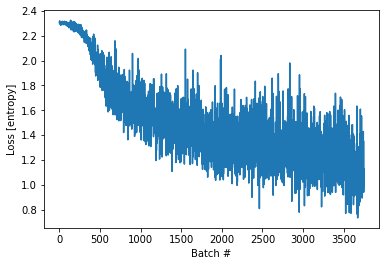

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

# Linear

In [ ]:
class Linear(tf.keras.Model):
  def __init__(self):
    super(Linear, self).__init__()
    self.W = tf.Variable(10., name = 'weight')
    self.B = tf.Variable(4., name = 'bias')

  def call(self, inputs):
    return inputs*self.W + self.B

In [ ]:
NUM_EXAMPLES = 1000
train_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
train_outputs = train_inputs*4. + 8. + noise

In [ ]:
def loss(model, inputs, targets):
  loss_error = model(inputs) - targets
  return tf.reduce_mean(tf.square(loss_error))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    error = loss(model, inputs, targets)
  return tape.gradient(error, [model.W, model.B])

In [ ]:
model = Linear()
optimizer = tf.optimizers.SGD(learning_rate=0.01)

print('Init Loss: {:.3f}'.format(loss(model, train_inputs, train_outputs)))

Init Loss: 55.260


In [ ]:
steps = 300
for step in range(1, steps+1):
  grad_step = grad(model, train_inputs, train_outputs)
  optimizer.apply_gradients(zip(grad_step, [model.W, model.B]))
  if step%50 == 0 or step == 1:
    print('Loss after {:03d} step equal {:.3f}'.format(step, loss(model, train_inputs, train_outputs)))

Loss after 001 step equal 53.039
Loss after 050 step equal 7.708
Loss after 100 step equal 1.819
Loss after 150 step equal 1.089
Loss after 200 step equal 0.998
Loss after 250 step equal 0.987
Loss after 300 step equal 0.986


In [ ]:
print('W = {:4f} \n B = {:4f}'.format(model.W.numpy(), model.B.numpy()))

W = 3.983363 
 B = 8.014623


In [ ]:
model.save_weights('weights')
status = model.load_weights('weights')

In [ ]:
class Cubic(tf.keras.Model):
  def __init__(self):
    super(Cubic, self).__init__()
    self.W = tf.Variable(3., name = 'weigth')

  def call(self, inputs):
    return self.W*inputs**3

In [ ]:
cube = Cubic()
input = tf.constant(4.)
print(cube(input).numpy())

192.0


In [ ]:
3*(4**3)

192